In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

### Выполнить разведочный анализ (EDA)

Существует взаимосвязь между наличием сердечных заболеваний и cp, thalach, exang, oldpeak, shope, ca, thal

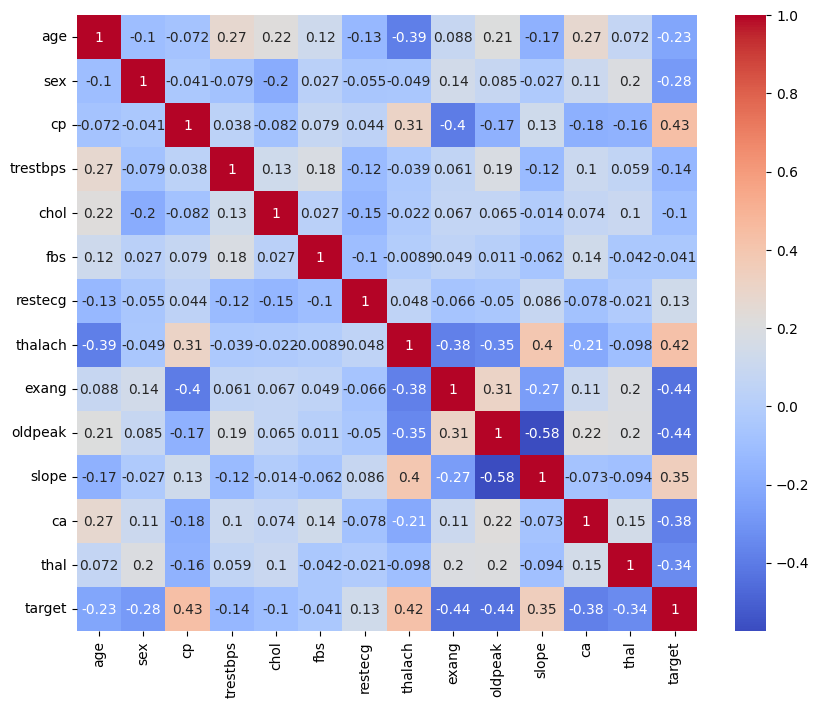

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

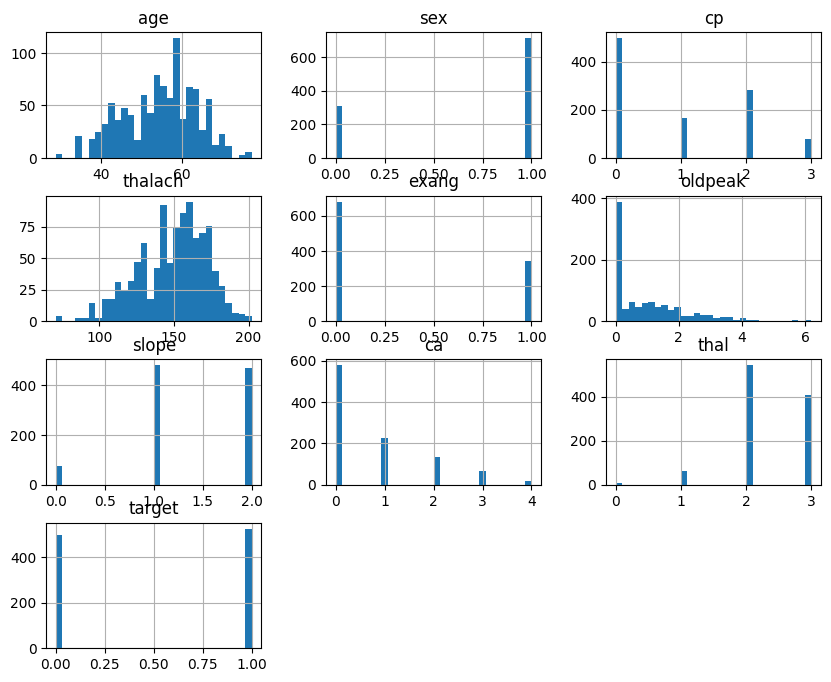

In [6]:
data = df.drop(['trestbps','chol','fbs','restecg'],axis=1)
data.hist(bins=30,figsize=(10,8))
plt.show()

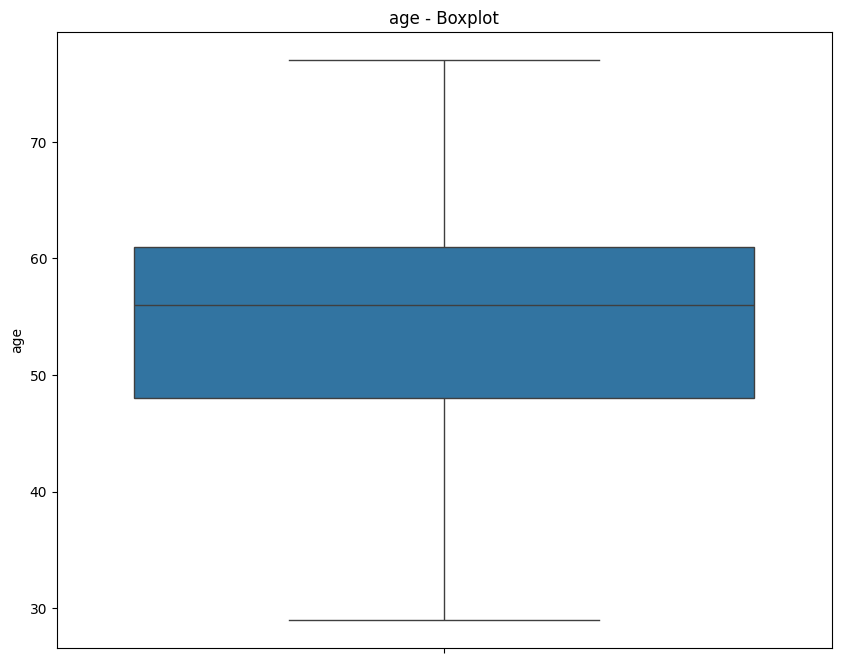

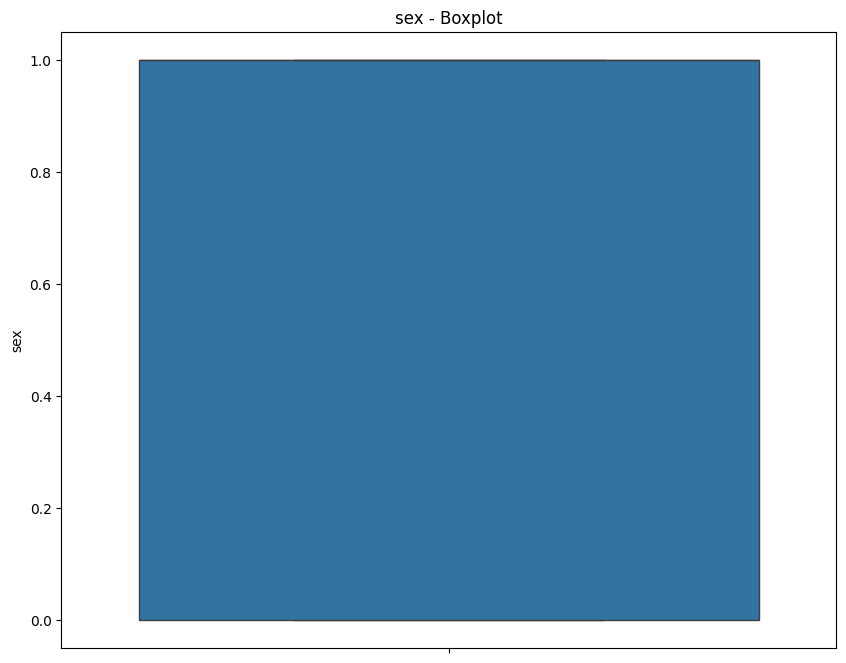

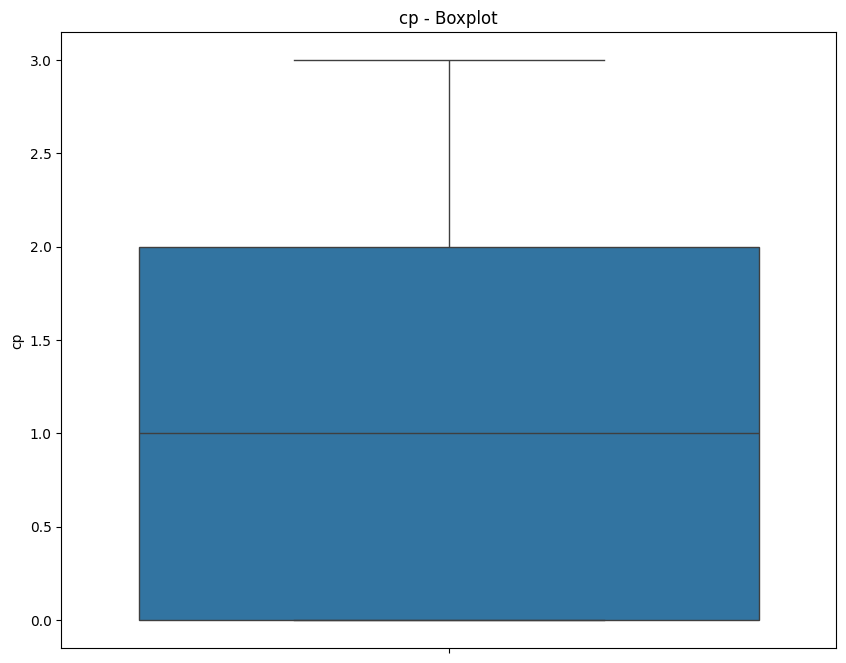

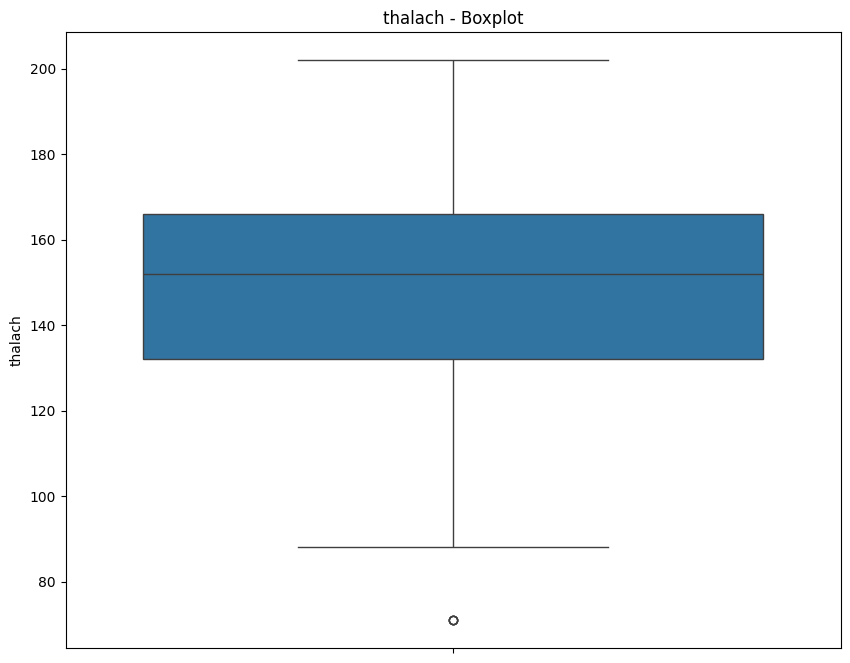

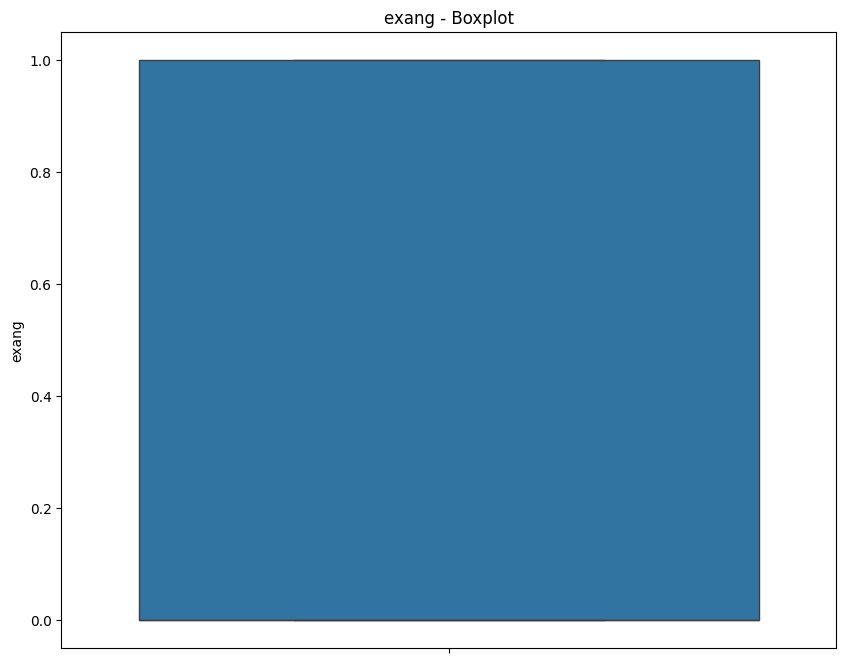

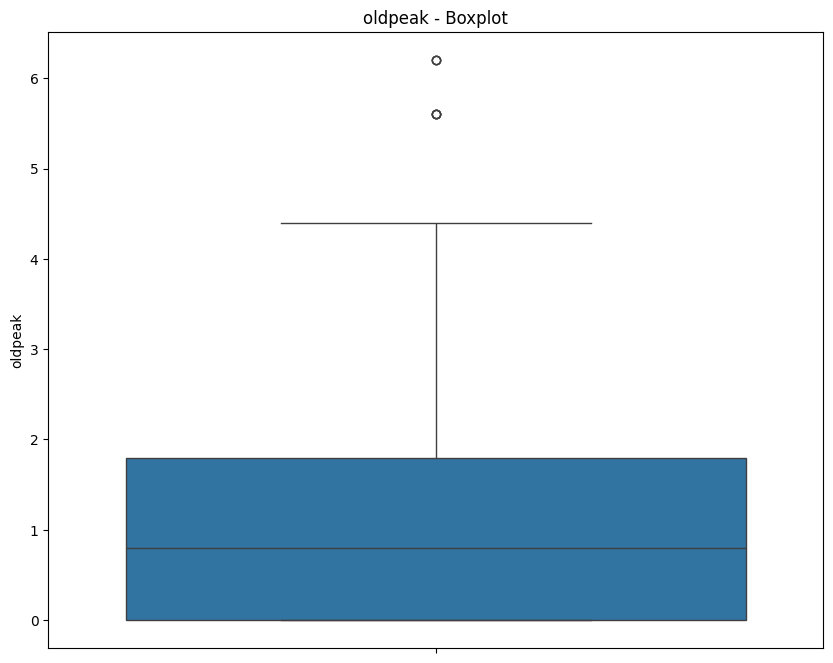

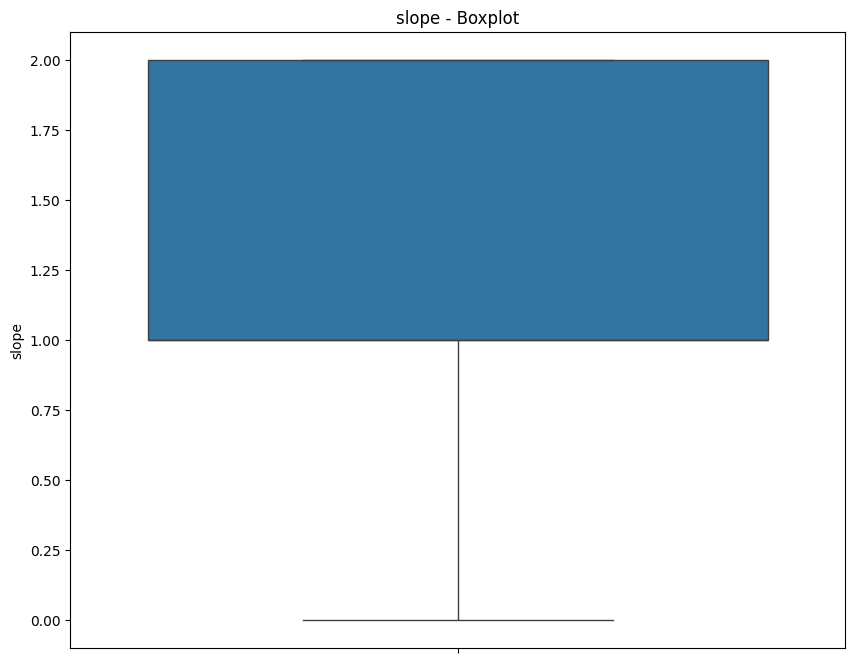

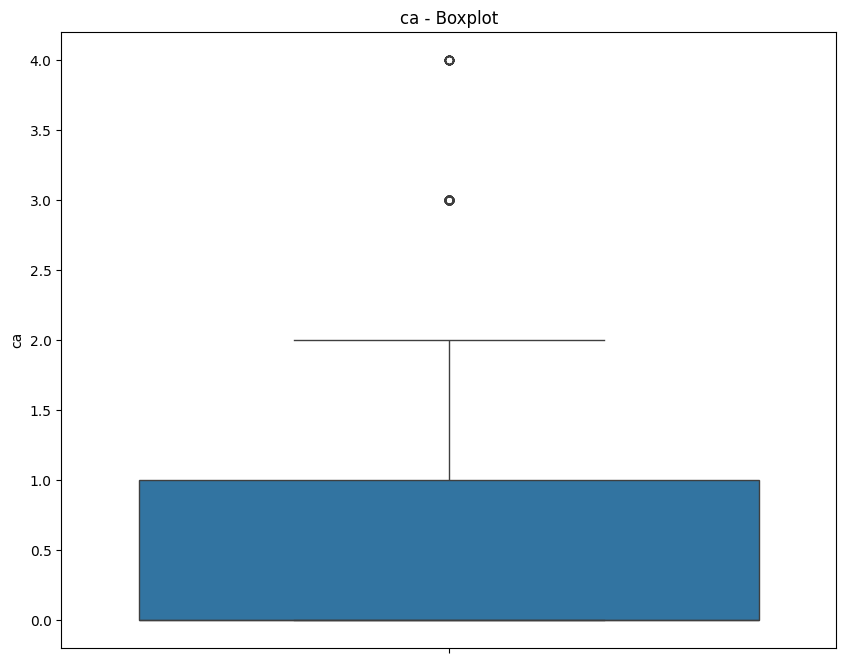

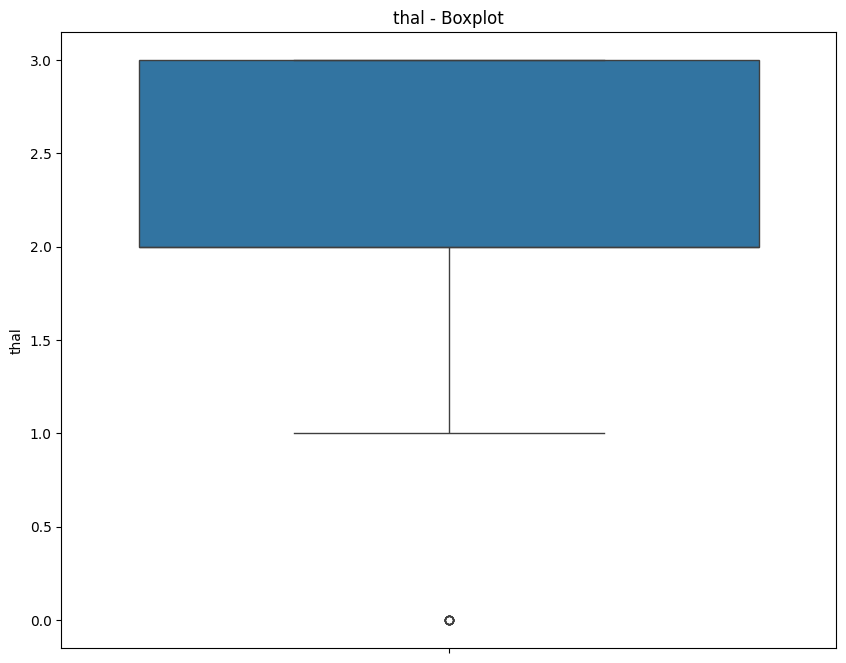

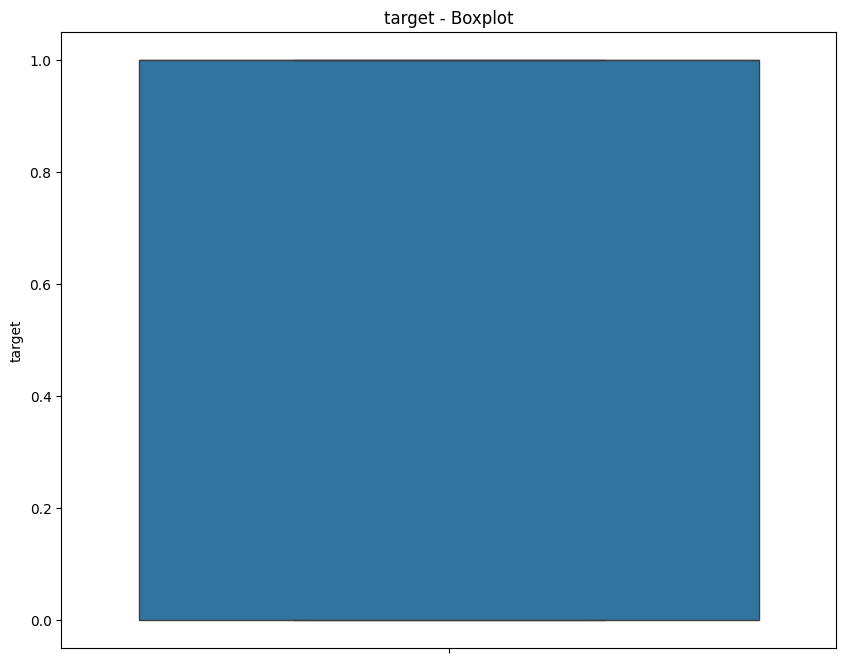

In [7]:
for c in data.columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(y=data[c])
    plt.title(f"{c} - Boxplot")  
    plt.show()  

In [8]:
X = data.drop("target",axis=1)
y = data["target"]

### data clean and feature engineering

In [10]:
data.dtypes

age          int64
sex          int64
cp           int64
thalach      int64
exang        int64
oldpeak    float64
slope        int64
ca           int64
thal         int64
target       int64
dtype: object

In [13]:
data.describe()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Сегментация и стандартизация данных

In [14]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###  Самостоятельно реализовать один из методов классификации

In [28]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = distances.argsort()[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            predictions.append(np.bincount(k_nearest_labels).argmax())
        return np.array(predictions)

In [29]:
# Определите функцию кросс-валидации
def cross_validate_knn(X, y, k_values, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    best_k = None
    best_score = 0

    for k in k_values:
        scores = []
        for train_idx, val_idx in kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]
            
            # 使用自定义 KNNClassifier
            knn = KNNClassifier(k=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_val)
            scores.append(accuracy_score(y_val, y_pred))
        
        mean_score = np.mean(scores)
        print(f"k={k}, Cross-validated accuracy={mean_score}")
        if mean_score > best_score:
            best_score = mean_score
            best_k = k

    return best_k, best_score

In [30]:
k_values = [1, 3, 5, 7, 9, 11]
best_k, best_score = cross_validate_knn(X_train, y_train.to_numpy(), k_values)

print(f"Best k: {best_k}, Best Cross-Validated Accuracy: {best_score}")

k=1, Cross-validated accuracy=0.9804878048780488
k=3, Cross-validated accuracy=0.9170731707317075
k=5, Cross-validated accuracy=0.8634146341463413
k=7, Cross-validated accuracy=0.8512195121951219
k=9, Cross-validated accuracy=0.852439024390244
k=11, Cross-validated accuracy=0.8609756097560975
Best k: 1, Best Cross-Validated Accuracy: 0.9804878048780488


In [21]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred))

KNN Accuracy: 0.8731707317073171


In [32]:
knn = KNNClassifier(k=best_k)
knn.fit(X_train, y_train.to_numpy())

y_pred = knn.predict(X_test)

### Реализация моделей классификации с помощью sklearn

In [33]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

In [34]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8
Logistic Regression Confusion Matrix:
 [[74 28]
 [13 90]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

SVM Accuracy: 0.8926829268292683
SVM Confusion Matrix:
 [[85 17]
 [ 5 98]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.89       102
           1       0.85      0.95      0.90       103

    accuracy                           0.89       205
   macro avg       0.90      0.89      0.89       205
weighted avg       0.90      0.89      0.89       205

KNN Accuracy: 0.8731707317073171
KNN Confusion Matrix:
 [[82 20]
 [ 6 97]]
KNN Classification Report:
     

### Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

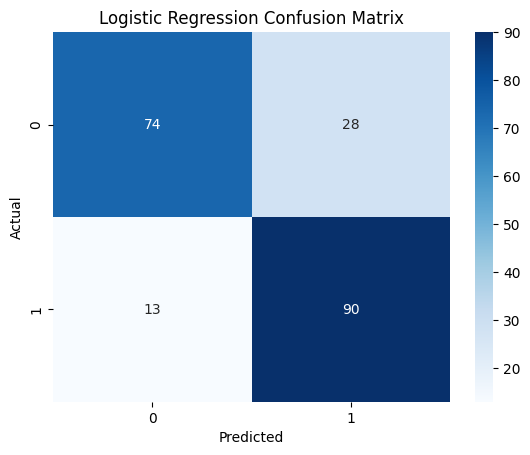

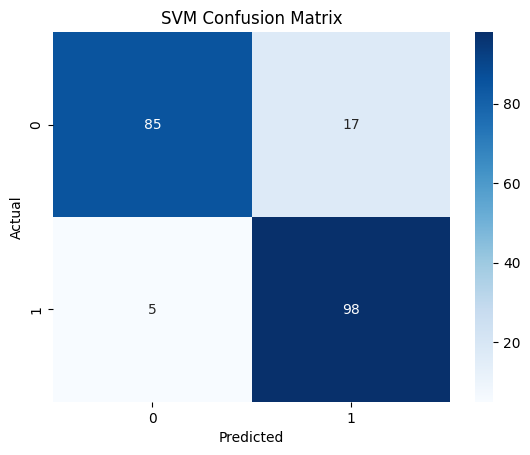

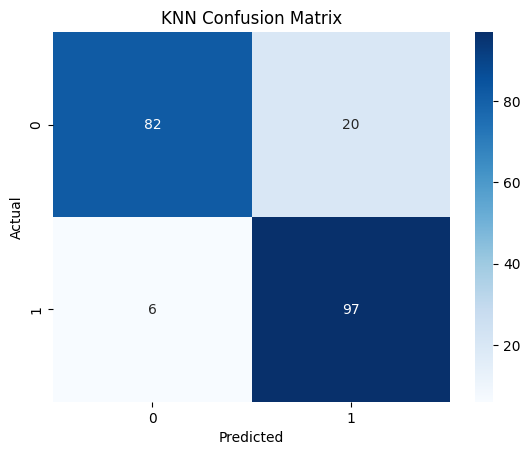

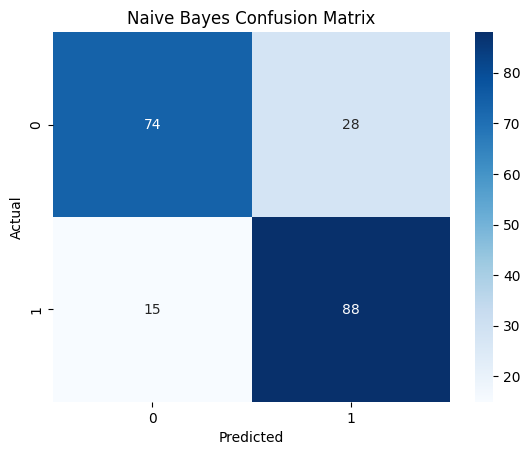

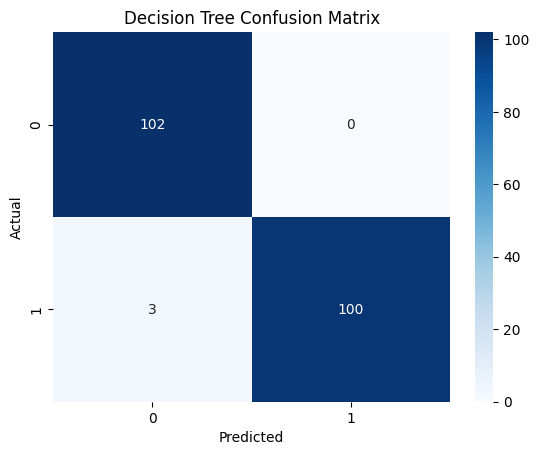

In [35]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Реализовать еще один из методов классификации и добавить его в сравнение.

In [40]:
class NaiveBayesClassifier:
    def fit(self, X_train, y_train):
        self.classes, class_counts = np.unique(y_train, return_counts=True)
        self.priors = class_counts / len(y_train)
        
        self.means = {}
        self.variances = {}
        for cls in self.classes:
            X_cls = X_train[y_train == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.variances[cls] = np.var(X_cls, axis=0)
    
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            class_probs = []
            for cls in self.classes:
                mean = self.means[cls]
                variance = self.variances[cls]
                prob = np.exp(-((x - mean) ** 2) / (2 * variance)) / np.sqrt(2 * np.pi * variance)
                class_probs.append(np.sum(np.log(prob)) + np.log(self.priors[np.where(self.classes == cls)[0][0]]))
            predictions.append(self.classes[np.argmax(class_probs)])
        return np.array(predictions)

In [41]:
nb = NaiveBayesClassifier()
nb.fit(X_train, y_train.to_numpy())

In [42]:
y_pred_nb = nb.predict(X_test)

In [43]:
print("Naive Bayes (Custom) Test Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes (Custom) Test Set Performance:
Accuracy: 0.7902439024390244
Confusion Matrix:
 [[74 28]
 [15 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.77       102
           1       0.76      0.85      0.80       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.79      0.79      0.79       205



In [44]:
models['Naive Bayes (Custom)'] = nb

for name, model in models.items():
    if name == 'Naive Bayes (Custom)':
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test)
    
    print(f"{name} Test Set Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Test Set Performance:
Accuracy: 0.8
Confusion Matrix:
 [[74 28]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

SVM Test Set Performance:
Accuracy: 0.8926829268292683
Confusion Matrix:
 [[85 17]
 [ 5 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.89       102
           1       0.85      0.95      0.90       103

    accuracy                           0.89       205
   macro avg       0.90      0.89      0.89       205
weighted avg       0.90      0.89      0.89       205

KNN Test Set Performance:
Accuracy: 0.8731707317073171
Confusion Matrix:
 [[82 20]
 [ 6 97]]
Classification Rep